# Exercise 1

In [4]:
# exercise 1a
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


filename = 'data/A0001.mat'
data = scipy.io.loadmat(filename)
print(data)
val = data['val']


num_leads, num_time_points = val.shape
print(f'nr. leads: {num_leads}, nr. time points: {num_time_points}')

{'val': array([[  28,   39,   45, ...,  258,  259,  259],
       [   7,   11,   15, ...,  248,  249,  250],
       [ -21,  -28,  -30, ...,  -10,  -10,   -9],
       ...,
       [-112, -110, -108, ...,  194,  194,  195],
       [-596, -590, -582, ...,  307,  307,  307],
       [ -16,   -7,    2, ...,  213,  214,  214]], dtype=int16)}
nr. leads: 12, nr. time points: 7500


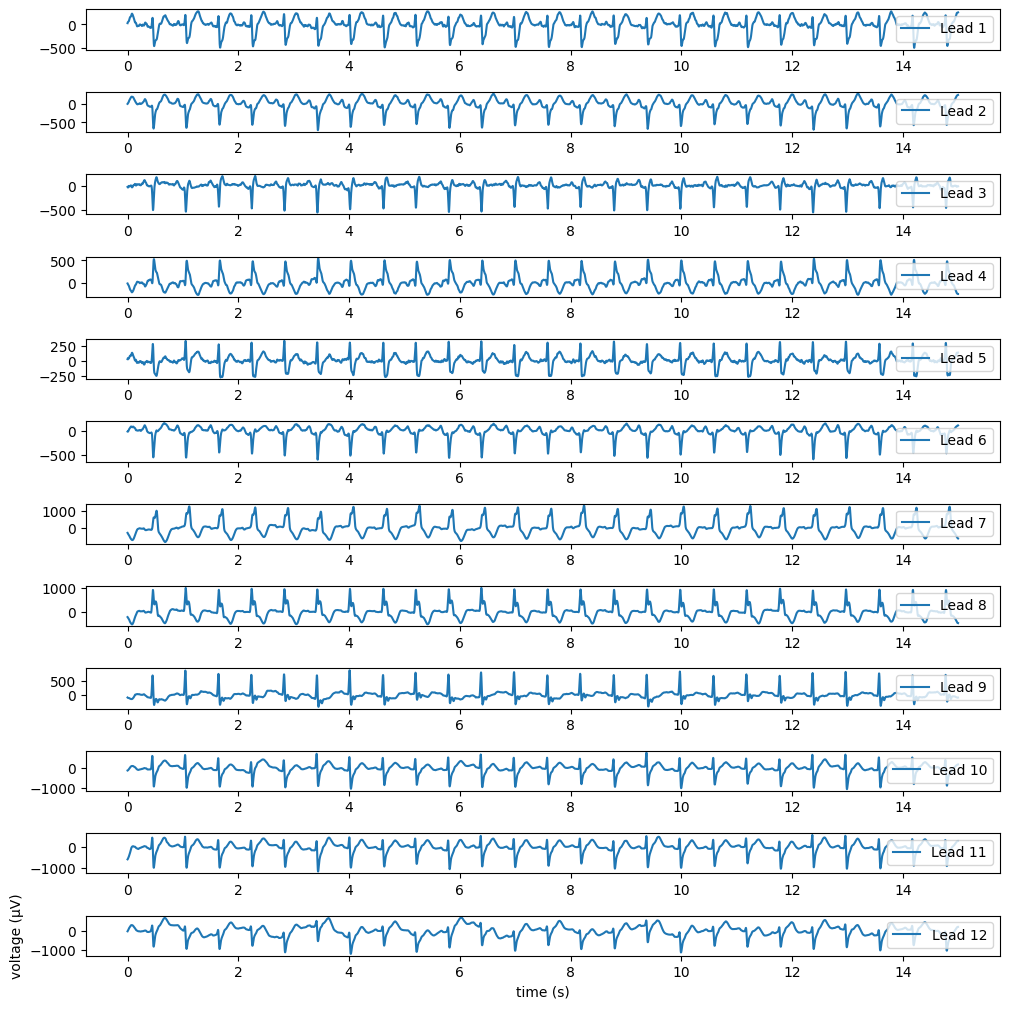

In [12]:
# exercise 1b
frequency = 500  
times = np.arange(num_time_points) / frequency

plt.figure(figsize=(10, 10))
for i in range(num_leads):
    plt.subplot(num_leads, 1, i + 1)
    plt.plot(times, val[i, :], label=f'Lead {i+1}')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.xlabel('time (s)', loc='center')
plt.ylabel('voltage (µV)', loc='center')
plt.show()

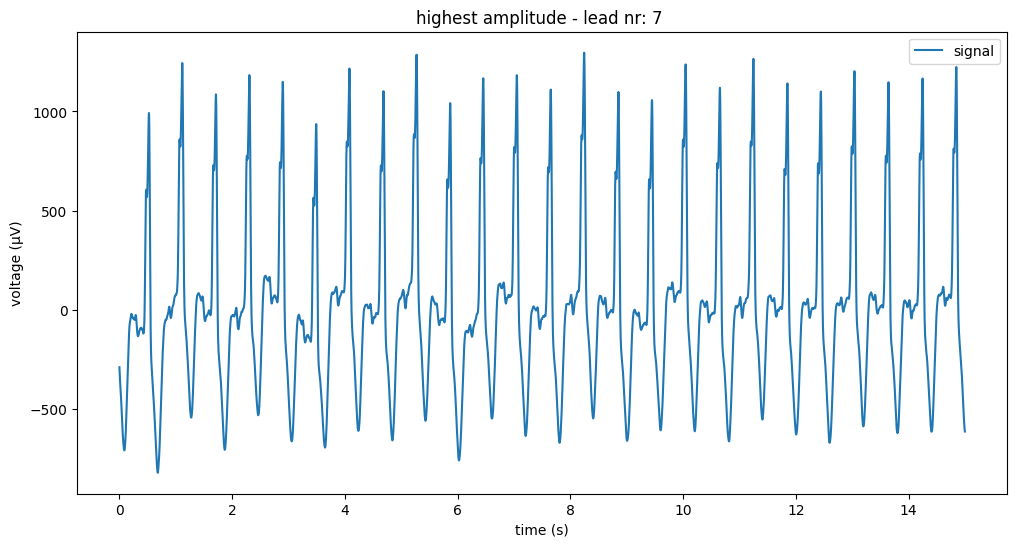

In [35]:
max_amp = np.max(np.abs(val), axis=1)
lead_highest = np.argmax(max_amp)

plt.figure(figsize=(12, 6))
plt.plot(times, val[lead_highest, :], label='signal')
plt.xlabel('time (s)')
plt.ylabel('voltage (µV)')
plt.title(f'highest amplitude - lead nr: {lead_highest + 1} ')
plt.legend()
plt.show()


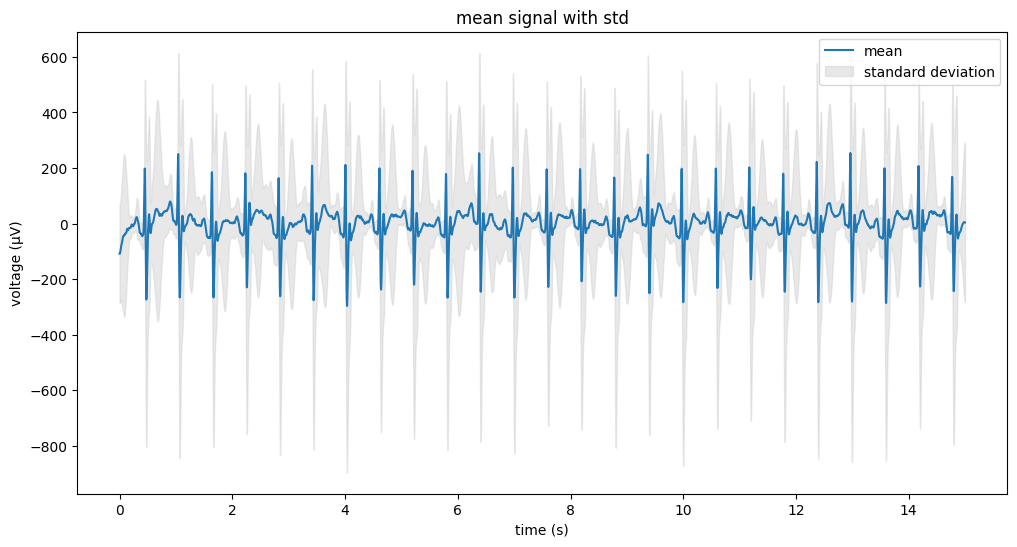

In [36]:
# exercise 1c
mean = np.mean(val, axis=0)
std = np.std(val, axis=0)
plt.figure(figsize=(12, 6))
plt.plot(times, mean, label='mean')
plt.fill_between(times, mean - std, mean + std, color='lightgray', alpha=0.5, label='standard deviation')
plt.xlabel('time (s)')
plt.ylabel('voltage (µV)')
plt.title('mean signal with std')
plt.legend()
plt.show()


[ 262  533  557  833  856 1130 1153 1425 1449 1745 2017 2040 2319 2342
 2613 2635 2909 2934 3203 3227 3502 3525 3803 3826 4099 4122 4401 4426
 4698 4723 4999 5022 5303 5326 5600 5623 5900 5925 6196 6221 6496 6519
 6798 6821 7101 7124 7399 7423]


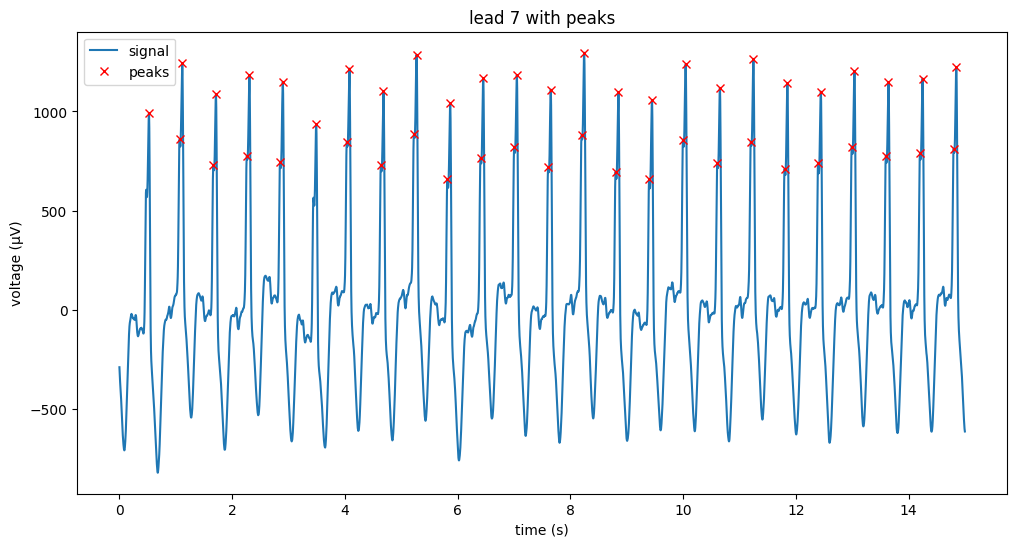

In [48]:
# exercise 2a and 2b
def find_peaks_in_lead(data, lead, height):
    peaks, _ = find_peaks(data[lead, :], height=height)
    return peaks

peaks = find_peaks_in_lead(val, lead_highest, height=np.max(val[lead_highest, :])*0.5)
print(peaks)
plt.figure(figsize=(12, 6))
plt.plot(times, val[lead_highest, :], label='signal')
plt.plot(times[peaks], val[lead_highest, peaks], 'rx', label='peaks')
plt.xlabel('time (s)')
plt.ylabel('voltage (µV)')
plt.title(f'lead {lead_highest + 1} with peaks')
plt.legend()
plt.show()



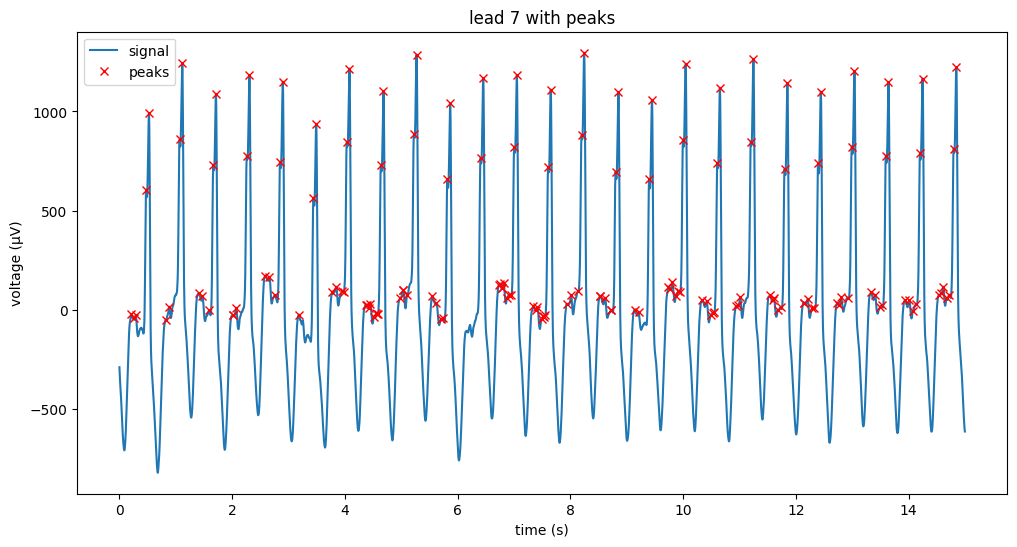

In [47]:
# experiment with height parameter 
peaks = find_peaks_in_lead(val, lead_highest, height=-50) # if negative we find plateaus or local maxima and not only global maxima
plt.figure(figsize=(12, 6))
plt.plot(times, val[lead_highest, :], label='signal')
plt.plot(times[peaks], val[lead_highest, peaks], 'rx', label='peaks')
plt.xlabel('time (s)')
plt.ylabel('voltage (µV)')
plt.title(f'lead {lead_highest + 1} with peaks')
plt.legend()
plt.show()